# Omkar Patil
# 10621685
#EXPLORING DIFFERENT COMPUTER VISION APPROACHES FOR DETECTING VIOLENCE: A COMPARATIVE SCIENTIFIC STUDY

### DataSet
DataSet Present [DBS OneDrive](https://mydbs-my.sharepoint.com/:f:/g/personal/10621685_mydbs_ie/EpMpi9HMhIRCvO1wkAQfA-4B1u9GWzb_Z0W9YlRbSLH5fQ?e=lkkb6v)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1) CNN

### Importing Libraries

In [ ]:

import cv2
import imutils
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

###  Define function to load video data

In [ ]:
def load_video(video_path, fixed_frames=100, fixed_size=(256, 256)):
    stream = cv2.VideoCapture(video_path)
    frames = []
    while True:
        (grabbed, frame) = stream.read()
        if not grabbed:
            break
        frame = cv2.resize(frame, fixed_size)  # Resize to fixed width and height
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frames.append(frame)
    stream.release()

    # If video has more frames than the required, truncate them
    if len(frames) > fixed_frames:
        frames = frames[:fixed_frames]

    # If video has fewer frames than the required, pad with zeros
    elif len(frames) < fixed_frames:
        padding_frames = [np.zeros((fixed_size[1], fixed_size[0], 3), dtype=np.uint8)
                          for _ in range(fixed_frames - len(frames))]
        frames += padding_frames

    #return np.array(frames)
    averaged_video = np.mean(np.array(frames), axis=0)

    return averaged_video


### Load dataset from the folders

In [ ]:

data_dir =  '/content/drive/MyDrive/DataSet'
class_names = ["violence", "non-violence"]

### Collecting Data

In [ ]:
videos = []
labels = []

for i, class_name in enumerate(class_names):
    folder_path = os.path.join(data_dir, class_name)
    for video_file in os.listdir(folder_path):
        if video_file.endswith('.mp4'):
            video_tensor = load_video(os.path.join(folder_path, video_file))
            videos.append(video_tensor)
            labels.append(i)

videos = np.stack(videos)  # Convert list of video tensors to an array
labels = to_categorical(np.array(labels))


### Splitting the dataSet

In [ ]:

(trainX, testX, trainY, testY) = train_test_split(videos, labels, test_size=0.2, random_state=42)
(trainX, valX, trainY, valY) = train_test_split(trainX, trainY, test_size=0.25, random_state=42)


### Building CNN model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=trainX.shape[1:]),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 246016)            0         
                                                                 
 dense (Dense)               (None, 64)                1

In [ ]:
hist = model.fit(trainX, trainY, epochs=5, batch_size=20, validation_data=(valX, valY))


Epoch 1/5
15/15 [==============================] - 46s 3s/step - loss: 300.9388 - accuracy: 0.6033 - val_loss: 7.6333 - val_accuracy: 0.7624
Epoch 2/5
15/15 [==============================] - 45s 3s/step - loss: 4.5334 - accuracy: 0.7967 - val_loss: 4.8923 - val_accuracy: 0.7525
Epoch 3/5
15/15 [==============================] - 45s 3s/step - loss: 1.1037 - accuracy: 0.8867 - val_loss: 1.6862 - val_accuracy: 0.7327
Epoch 4/5
15/15 [==============================] - 48s 3s/step - loss: 0.2957 - accuracy: 0.9000 - val_loss: 1.7978 - val_accuracy: 0.7822
Epoch 5/5
15/15 [==============================] - 44s 3s/step - loss: 0.2179 - accuracy: 0.9467 - val_loss: 1.7730 - val_accuracy: 0.8218


### Plotting Evaluation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

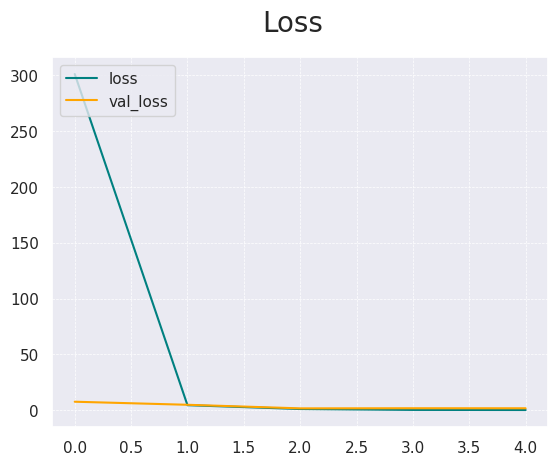

In [ ]:
sns.set_theme()

fig = plt.figure()

plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')

fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

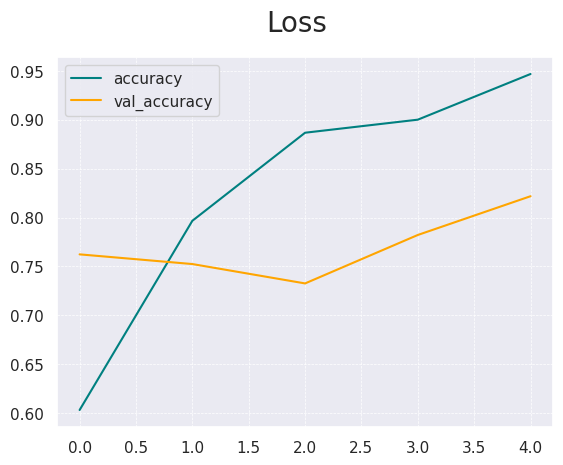

In [ ]:
sns.set_theme()

fig = plt.figure()

plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')

fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

In [ ]:
y_pred_probabilities = model.predict(testX)
y_pred = np.argmax(y_pred_probabilities, axis=1)
y_true = np.argmax(testY, axis=1)


4/4 [==============================] - 7s 965ms/step


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
conf_matrix = confusion_matrix(y_true, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Precision: 0.844161545215101
Recall: 0.8143544506816359
F1 Score: 0.8216103896103897
Confusion Matrix:
 [[54  4]
 [13 30]]


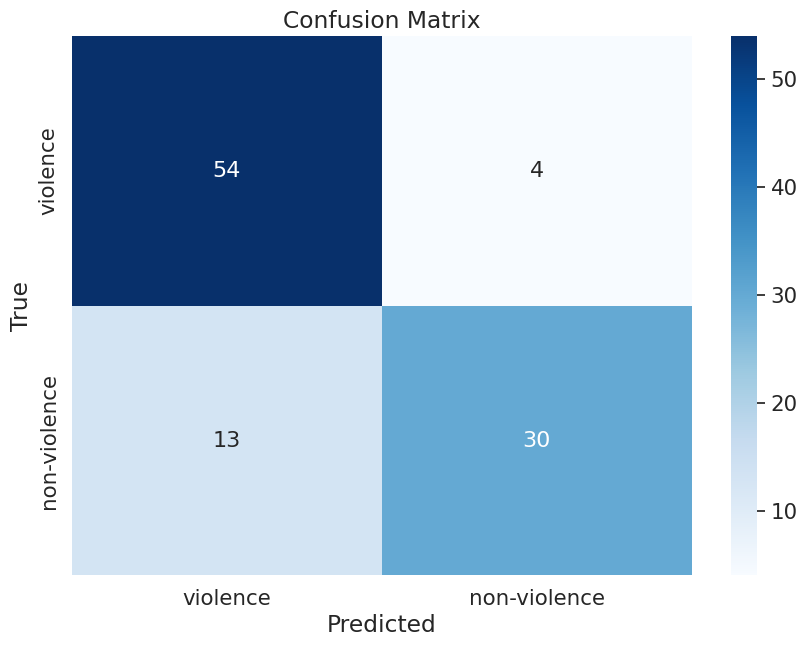

In [ ]:
conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, fmt='g',
            cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Saving model for future

In [ ]:
model.save('CNN.h5')
model.save('saved_model/CNN')

## 2) R-CNN

### Installing important Libraries

In [ ]:

!pip install imutils opencv-python tensorflow-addons

### Importing Libraries

In [ ]:
import cv2
import imutils
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16

### Defining function to load data

In [ ]:
def load_video(video_path, fixed_size=(500, 500)):
    stream = cv2.VideoCapture(video_path)
    frames = []
    while True:
        (grabbed, frame) = stream.read()
        if not grabbed:
            break
        frame = cv2.resize(frame, fixed_size)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frames.append(frame)
    stream.release()
    averaged_video = np.mean(np.array(frames), axis=0)
    return averaged_video


### Load Dataset from folder

In [ ]:
data_dir = '/content/drive/MyDrive/DataSet'
class_names = ["violence", "non-violence"]

### Collecting Data

In [ ]:
videos = []
labels = []

for i, class_name in enumerate(class_names):
    folder_path = os.path.join(data_dir, class_name)
    for video_file in os.listdir(folder_path):
        if video_file.endswith('.mp4'):
            video_tensor = load_video(os.path.join(folder_path, video_file))
            videos.append(video_tensor)
            labels.append(i)

videos = np.stack(videos)
labels = to_categorical(np.array(labels))

### Splitting the DataSet

In [ ]:
(trainX, testX, trainY, testY) = train_test_split(videos, labels, test_size=0.2, random_state=42)


### Building R-CNN model

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=trainX.shape[1:])

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
predictions = tf.keras.layers.Dense(2, activation='softmax')(x)

model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500, 500, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 500, 500, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 500, 500, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 250, 250, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 250, 250, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 250, 250, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 125, 125, 128)     0     

### Training the model

In [ ]:
hist = model.fit(trainX, trainY, epochs=5, batch_size=20, validation_split=0.2)


Epoch 1/5
16/16 [==============================] - 1279s 81s/step - loss: 16.4802 - accuracy: 0.7063 - val_loss: 9.5572 - val_accuracy: 0.8642
Epoch 2/5
16/16 [==============================] - 1253s 79s/step - loss: 4.3568 - accuracy: 0.8969 - val_loss: 4.3807 - val_accuracy: 0.9012
Epoch 3/5
16/16 [==============================] - 1245s 79s/step - loss: 0.6267 - accuracy: 0.9563 - val_loss: 3.9922 - val_accuracy: 0.8642
Epoch 4/5
16/16 [==============================] - 1224s 78s/step - loss: 0.3771 - accuracy: 0.9812 - val_loss: 3.3789 - val_accuracy: 0.9012
Epoch 5/5
16/16 [==============================] - 1219s 77s/step - loss: 0.0870 - accuracy: 0.9906 - val_loss: 2.4035 - val_accuracy: 0.9012


###Plotting Evaluation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

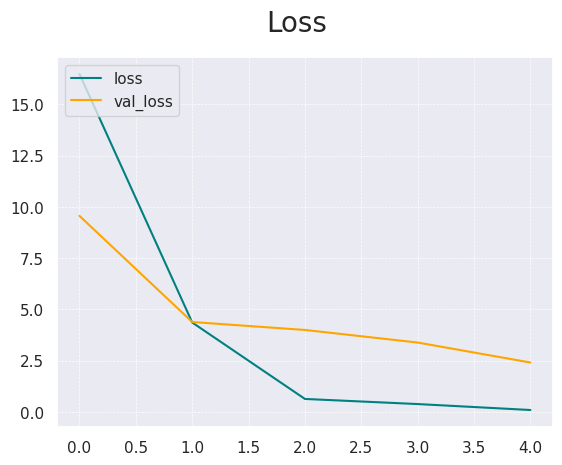

In [ ]:
sns.set_theme()

fig = plt.figure()

plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')

fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

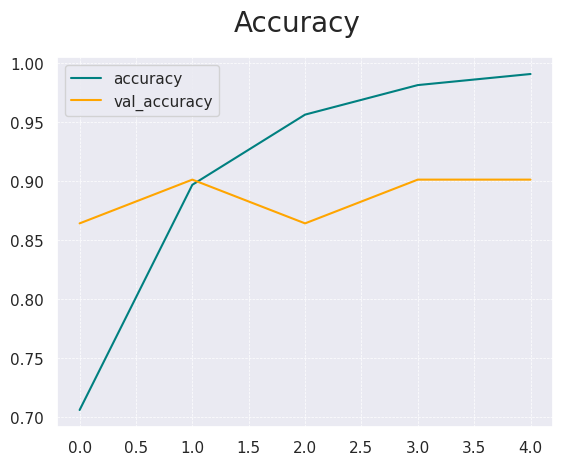

In [ ]:
sns.set_theme()

fig = plt.figure()

plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')

fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

In [ ]:
y_pred_probabilities = model.predict(testX)
y_pred = np.argmax(y_pred_probabilities, axis=1)
y_true = np.argmax(testY, axis=1)


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
conf_matrix = confusion_matrix(y_true, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

In [ ]:
conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, fmt='g',
            cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Saving model for future

In [ ]:
model.save('RCNN.h5')
model.save('saved_model/RCNN')

## 3) Mobinet

### Importing Libraries

In [ ]:
import os
import platform
from IPython.display import clear_output


In [ ]:
import tensorflow as tf
tf.random.set_seed(73)

print("Tensorflow version " + tf.__version__)

Tensorflow version 2.12.0


### To read video file

In [ ]:
from IPython.display import HTML
from base64 import b64encode

def play(filename):
    html = ''
    video = open(filename,'rb').read()
    src = 'data:video/mp4;base64,' + b64encode(video).decode()
    html += '<video width=640 muted controls autoplay loop><source src="%s" type="video/mp4"></video>' % src
    return HTML(html)

In [ ]:
path = '/content/drive/MyDrive/DataSet'

### Sample Video

In [ ]:
play('/content/drive/MyDrive/DataSet/violence/V_107.mp4')

In [ ]:
play('/content/drive/MyDrive/DataSet/non-violence/NV_44.mp4')

### Preprocessing
* Getting frames form video
* some image argumentations

In [ ]:
import cv2
import os
import imageio
import imgaug.augmenters as iaa
import imgaug as ia

In [ ]:
IMG_SIZE = 128
ColorChannels = 3

def video_to_frames(video):
    vidcap = cv2.VideoCapture(video)

    import math
    rate = math.floor(vidcap.get(3))
    count = 0

    ImageFrames = []
    while vidcap.isOpened():
        ID = vidcap.get(1)
        success, image = vidcap.read()

        if success:

            if (ID % 7 == 0):
                flip = iaa.Fliplr(1.0)
                zoom = iaa.Affine(scale=1.3)
                random_brightness = iaa.Multiply((1, 1.3))
                rotate = iaa.Affine(rotate=(-25, 25))

                image_aug = flip(image = image)
                image_aug = random_brightness(image = image_aug)
                image_aug = zoom(image = image_aug)
                image_aug = rotate(image = image_aug)

                rgb_img = cv2.cvtColor(image_aug, cv2.COLOR_BGR2RGB)
                resized = cv2.resize(rgb_img, (IMG_SIZE, IMG_SIZE))
                ImageFrames.append(resized)

            count += 1
        else:
            break

    vidcap.release()

    return ImageFrames

In [ ]:
%%time
from tqdm import tqdm

VideoDataDir = '/content/drive/MyDrive/DataSet'

X_original = []
y_original = []


CLASSES = ["non-violence", "violence"]


for category in os.listdir(VideoDataDir):
    path = os.path.join(VideoDataDir, category)
    class_num = CLASSES.index(category)
    for i, video in enumerate(tqdm(os.listdir(path)[0:350])):
        frames = video_to_frames(path + '/' + video)
        for j, frame in enumerate(frames):
            X_original.append(frame)
            y_original.append(class_num)

100%|██████████| 209/209 [01:13<00:00,  2.86it/s]


ValueError: ignored

In [ ]:
import numpy as np
X_original = np.array(X_original).reshape(-1 , IMG_SIZE * IMG_SIZE * 3)
y_original = np.array(y_original)
len(X_original)

9908

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

stratified_sample = StratifiedShuffleSplit(n_splits=2, test_size=0.3, random_state=73)

for train_index, test_index in stratified_sample.split(X_original, y_original):
    X_train, X_test = X_original[train_index], X_original[test_index]
    y_train, y_test = y_original[train_index], y_original[test_index]

X_train_nn = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 3) / 255
X_test_nn = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 3) / 255

### Model Training

In [ ]:
!pip install imutils

In [ ]:
import cv2
import os
import numpy as np
import pickle
import matplotlib
matplotlib.use("Agg")

from keras.layers import Input
from keras.models import Model
from keras.layers.core import Dropout,Flatten,Dense

import matplotlib.pyplot as plt

In [ ]:
epochs = 150

from keras import regularizers
kernel_regularizer = regularizers.l2(0.0001)

from keras.applications import MobileNetV2

In [ ]:
TPU_INIT = False

def load_layers():
    input_tensor = Input(shape=(IMG_SIZE, IMG_SIZE, ColorChannels))
    baseModel = MobileNetV2(pooling='avg',
                            include_top=False,
                            input_tensor=input_tensor)

    headModel = baseModel.output
    headModel = Dense(1, activation="sigmoid")(headModel)
    model = Model(inputs=baseModel.input, outputs=headModel)

    for layer in baseModel.layers:
        layer.trainable = False

    print("Compiling model...")
    model.compile(loss="binary_crossentropy",
                    optimizer='adam',
                    metrics=["accuracy"])

    return model

if TPU_INIT:
    with tpu_strategy.scope():
        model = load_layers()
else:
    model = load_layers()

model.summary()

9406464/9406464 [==============================] - 1s 0us/step
Compiling model...
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu 

In [ ]:
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping, ReduceLROnPlateau

patience = 3

start_lr = 0.00001
min_lr = 0.00001
max_lr = 0.00005

batch_size = 4

if TPU_INIT:
    max_lr = max_lr * tpu_strategy.num_replicas_in_sync
    batch_size = batch_size * tpu_strategy.num_replicas_in_sync

rampup_epochs = 5
sustain_epochs = 0
exp_decay = .8

def lrfn(epoch):
    if epoch < rampup_epochs:
        return (max_lr - start_lr)/rampup_epochs * epoch + start_lr
    elif epoch < rampup_epochs + sustain_epochs:
        return max_lr
    else:
        return (max_lr - min_lr) * exp_decay**(epoch-rampup_epochs-sustain_epochs) + min_lr


class myCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if ((logs.get('accuracy')>=0.999)):
            print("\nLimits Reached cancelling training!")
            self.model.stop_training = True

In [ ]:
end_callback = myCallback()

lr_callback = LearningRateScheduler(lambda epoch: lrfn(epoch), verbose=False)

early_stopping = EarlyStopping(patience = patience, monitor='val_loss',
                                 mode='min', restore_best_weights=True,
                                 verbose = 1, min_delta = .00075)

PROJECT_DIR = '/content/drive/MyDrive' + '/RiskDetection'

lr_plat = ReduceLROnPlateau(patience = 2, mode = 'min')

os.system('rm -rf ./logs/')

import datetime
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir = log_dir, write_graph=True, histogram_freq=1)

checkpoint_filepath = 'ModelWeights.h5'

model_checkpoints = ModelCheckpoint(filepath=checkpoint_filepath,
                                        save_weights_only=True,
                                        monitor='val_loss',
                                        mode='min',
                                        verbose = 1,
                                        save_best_only=True)


callbacks = [end_callback, lr_callback, model_checkpoints, tensorboard_callback, early_stopping, lr_plat]

if TPU_INIT:
    callbacks = [end_callback, lr_callback, model_checkpoints, early_stopping, lr_plat]

In [ ]:
print('Training head...')
#model.load_weights('./Model_Weights.h5')

history = model.fit(X_train_nn ,y_train, epochs=20,
                        callbacks=callbacks,
                        validation_data = (X_test_nn, y_test),
                        batch_size=batch_size)

print('\nRestoring best Weights for MobileNetV2')
model.load_weights(checkpoint_filepath)

Training head...
Epoch 1/20
1733/1734 [============================>.] - ETA: 0s - loss: 0.7599 - accuracy: 0.5845
Epoch 1: val_loss improved from inf to 0.66161, saving model to ModelWeights.h5
1734/1734 [==============================] - 170s 98ms/step - loss: 0.7599 - accuracy: 0.5846 - val_loss: 0.6616 - val_accuracy: 0.6485 - lr: 1.0000e-05
Epoch 2/20
1734/1734 [==============================] - ETA: 0s - loss: 0.6109 - accuracy: 0.6836
Epoch 2: val_loss improved from 0.66161 to 0.52700, saving model to ModelWeights.h5
1734/1734 [==============================] - 200s 115ms/step - loss: 0.6109 - accuracy: 0.6836 - val_loss: 0.5270 - val_accuracy: 0.7306 - lr: 1.8000e-05
Epoch 3/20
1734/1734 [==============================] - ETA: 0s - loss: 0.4903 - accuracy: 0.7652
Epoch 3: val_loss improved from 0.52700 to 0.43808, saving model to ModelWeights.h5
1734/1734 [==============================] - 199s 115ms/step - loss: 0.4903 - accuracy: 0.7652 - val_loss: 0.4381 - val_accuracy: 0.79

In [ ]:
%matplotlib inline

def print_graph(item, index, history):
    plt.figure()
    train_values = history.history[item][0:index]
    plt.plot(train_values)
    test_values = history.history['val_' + item][0:index]
    plt.plot(test_values)
    plt.legend(['training','validation'])
    plt.title('Training and validation '+ item)
    plt.xlabel('epoch')
    plt.show()
    plot = '{}.png'.format(item)
    plt.savefig(plot)


def get_best_epoch(test_loss, history):
    for key, item in enumerate(history.history.items()):
        (name, arr) = item
        if name == 'val_loss':
            for i in range(len(arr)):
                if round(test_loss, 2) == round(arr[i], 2):
                    return i

def model_summary(model, history):
    print('---'*30)
    test_loss, test_accuracy = model.evaluate(X_test_nn, y_test, verbose=0)

    if history:
        index = get_best_epoch(test_loss, history)
        print('Best Epochs: ', index)

        train_accuracy = history.history['accuracy'][index]
        train_loss = history.history['loss'][index]

        print('Accuracy on train:',train_accuracy,'\tLoss on train:',train_loss)
        print('Accuracy on test:',test_accuracy,'\tLoss on test:',test_loss)
        print_graph('loss', index, history)
        print_graph('accuracy', index, history)
        print('---'*30)

------------------------------------------------------------------------------------------
Best Epochs:  19
Accuracy on train: 0.909733235836029 	Loss on train: 0.22475381195545197
Accuracy on test: 0.8953918814659119 	Loss on test: 0.2541576325893402


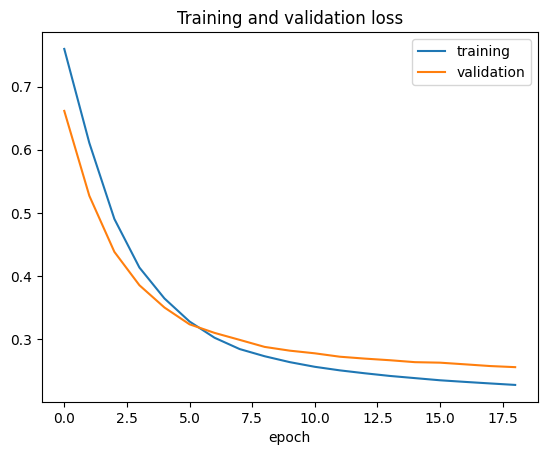

<Figure size 640x480 with 0 Axes>

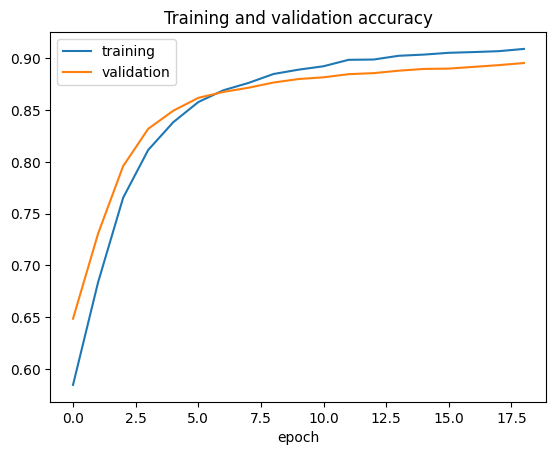

------------------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

In [ ]:
model_summary(model, history)


### Evaluation on test set

In [ ]:

print("Evaluating network...")
predictions = model.predict(X_test_nn)
preds = predictions > 0.5

Evaluating network...
93/93 [==============================] - 42s 437ms/step


<ipython-input-25-e5c1e9d3fb26>:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  n_correct = np.int((corr_pred[0][0] + corr_pred[1][1]))
<ipython-input-25-e5c1e9d3fb26>:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated

> Correct Predictions: 2662
> Wrong Predictions: 311


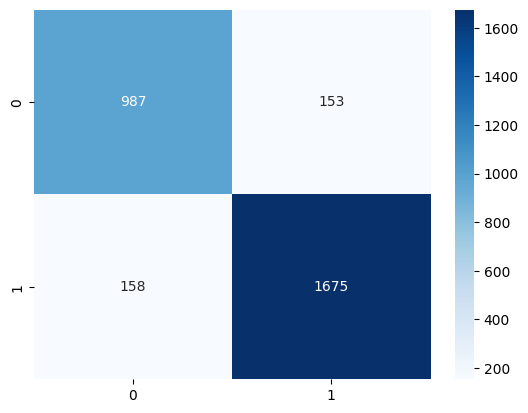

              precision    recall  f1-score   support

non-violence       0.86      0.87      0.86      1140
    violence       0.92      0.91      0.92      1833

    accuracy                           0.90      2973
   macro avg       0.89      0.89      0.89      2973
weighted avg       0.90      0.90      0.90      2973



In [ ]:
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay, accuracy_score, classification_report, confusion_matrix
corr_pred = metrics.confusion_matrix(y_test, preds)

n_correct = np.int((corr_pred[0][0] + corr_pred[1][1]))
print('> Correct Predictions:', n_correct)
n_wrongs = np.int((corr_pred[0][1] + (corr_pred[1][0])))
print('> Wrong Predictions:', n_wrongs)

sns.heatmap(corr_pred,annot=True, fmt="d",cmap="Blues")
plt.show()

print(metrics.classification_report(y_test, preds,
                           target_names=["non-violence", "violence"]))

In [ ]:
args_model = "Mobinet.h5"
model.save(args_model)

## 4) SSD

### Importing Libraries

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

### Defining Path

In [ ]:

data_root = '/content/drive/MyDrive/DataSet'
violence_path = os.path.join(data_root, 'violence')
non_violence_path = os.path.join(data_root, 'non-violence')

### Get list of video file paths and labels

In [ ]:
violence_videos = [os.path.join(violence_path, file) for file in os.listdir(violence_path) if file.endswith('.mp4')]
non_violence_videos = [os.path.join(non_violence_path, file) for file in os.listdir(non_violence_path) if file.endswith('.mp4')]


In [ ]:
videos = violence_videos + non_violence_videos
labels = [1] * len(violence_videos) + [0] * len(non_violence_videos)


###  Split dataset

In [ ]:
train_videos, test_videos, train_labels, test_labels = train_test_split(videos, labels, test_size=0.2, random_state=42)
train_videos, val_videos, train_labels, val_labels = train_test_split(train_videos, train_labels, test_size=0.25, random_state=42)


### Define a function to load and preprocess frames from video

In [ ]:
def load_and_preprocess_frames_from_video(video_path, num_frames=20):
    frames = []
    cap = cv2.VideoCapture(video_path)
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame = cv2.resize(frame, (112, 112))  # Resize to a smaller shape for 3D convnets for faster training
        frames.append(frame / 255.0)
    cap.release()

    # Truncate or pad frames
    if len(frames) > num_frames:
        frames = frames[:num_frames]
    elif len(frames) < num_frames:
        frames += [frames[-1]] * (num_frames - len(frames))

    return np.array(frames)


### Prepare Data

In [ ]:
def prepare_data(video_paths, labels):
    data = [load_and_preprocess_frames_from_video(video) for video in video_paths]
    return np.array(data), np.array(labels)

train_data, train_labels = prepare_data(train_videos, train_labels)
val_data, val_labels = prepare_data(val_videos, val_labels)
test_data, test_labels = prepare_data(test_videos, test_labels)


###  Model Definition

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv3D(32, (3, 3, 3), activation='relu', input_shape=(20, 112, 112, 3)),
    tf.keras.layers.MaxPooling3D((2, 2, 2)),
    tf.keras.layers.Conv3D(64, (3, 3, 3), activation='relu'),
    tf.keras.layers.MaxPooling3D((2, 2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 18, 110, 110, 32)  2624      
                                                                 
 max_pooling3d (MaxPooling3D  (None, 9, 55, 55, 32)    0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 7, 53, 53, 64)     55360     
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 3, 26, 26, 64)    0         
 3D)                                                             
                                                                 
 flatten (Flatten)           (None, 129792)            0         
                                                                 
 dense (Dense)               (None, 128)               1

### Training

In [ ]:
hist = model.fit(train_data, train_labels, batch_size=8, epochs=5, validation_data=(val_data, val_labels))


Epoch 1/5
38/38 [==============================] - 504s 13s/step - loss: 1.0578 - accuracy: 0.5733 - val_loss: 0.6018 - val_accuracy: 0.6139
Epoch 2/5
38/38 [==============================] - 470s 12s/step - loss: 0.6410 - accuracy: 0.6533 - val_loss: 0.6336 - val_accuracy: 0.7129
Epoch 3/5
38/38 [==============================] - 477s 13s/step - loss: 0.6088 - accuracy: 0.6633 - val_loss: 0.6510 - val_accuracy: 0.5842
Epoch 4/5
38/38 [==============================] - 471s 12s/step - loss: 0.5316 - accuracy: 0.7633 - val_loss: 0.6809 - val_accuracy: 0.6436
Epoch 5/5
38/38 [==============================] - 477s 13s/step - loss: 0.3804 - accuracy: 0.8400 - val_loss: 0.8222 - val_accuracy: 0.5743


### Evaluation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

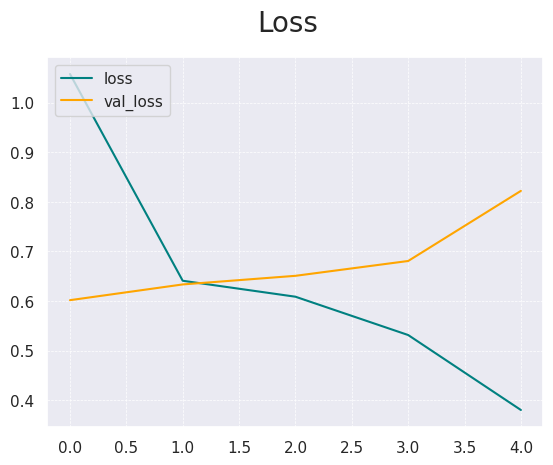

In [ ]:
sns.set_theme()

fig = plt.figure()

plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')

fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

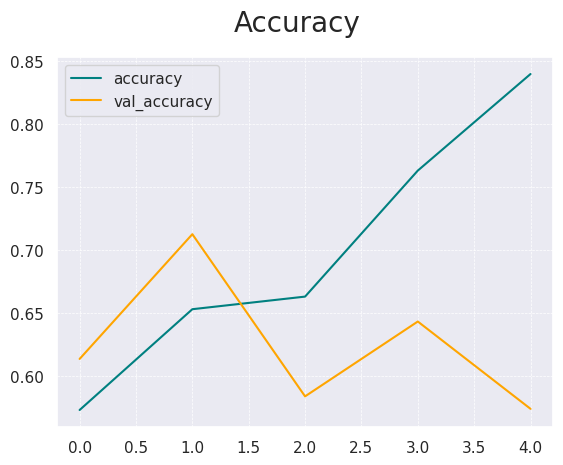

In [ ]:
sns.set_theme()

fig = plt.figure()

plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')

fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


4/4 [==============================] - 32s 7s/step - loss: 0.6225 - accuracy: 0.6535
Test Accuracy: 65.35%


### Save Model

In [ ]:
model.save('SSD.h5')
model.save('saved_model/SSD')

## 5) Inception

### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


In [ ]:
import cv2
import os
import sys
import glob
from tqdm import tqdm

###Importing Data

In [ ]:
PATH_violence = "/content/drive/MyDrive/DataSet/violence"

In [ ]:
os.makedirs('./data/ViolencePicture',exist_ok=True)
for path in tqdm(glob.glob(PATH_violence+'/*')):
    fname = os.path.basename(path).split('.')[0]
    vidcap = cv2.VideoCapture(path)
    success,image = vidcap.read()
    count = 0
    while success:
        if count % 5 == 0:
            cv2.imwrite("./data/ViolencePicture/{}-{}.jpg".format(fname,str(count).zfill(4)),image)     # save frame as JPEG file
        success,image = vidcap.read()
        count += 1

100%|██████████| 293/293 [03:08<00:00,  1.55it/s]


In [ ]:
PATH_nonviolence = '/content/drive/MyDrive/DataSet/non-violence'

In [ ]:
os.makedirs('./data/NonViolencePicture',exist_ok=True)
for path in tqdm(glob.glob(PATH_nonviolence+'/*')):
    fname = os.path.basename(path).split('.')[0]
    vidcap = cv2.VideoCapture(path)
    success,image = vidcap.read()
    count = 0
    while success:
        if count % 5 == 0:
            cv2.imwrite("./data/NonViolencePicture/{}-{}.jpg".format(fname,str(count).zfill(4)),image)     # save frame as JPEG file
        success,image = vidcap.read()
        count += 1

100%|██████████| 209/209 [01:01<00:00,  3.41it/s]


### Modelling

In [ ]:
# import the necessary packages
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.pooling import AveragePooling2D
from keras.applications import ResNet50,MobileNetV2,MobileNet,InceptionV3
from keras.layers.core import Dropout
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers import Input
from keras.models import Model
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import warnings
import argparse
import pickle
import cv2
import os

In [ ]:
args = {
    "dataset": "data",
    "model": "model/violence_model.h5",
    "label-bin": "model/lb.pickle",
    "epochs": 5,
    "plot": "plot.png"

}

In [ ]:
LABELS = set(["ViolencePicture", "NonViolencePicture"])

In [ ]:
print('-'*100)
print("[INFO] loading images...")
print('-'*100)
imagePaths = list(paths.list_images(args["dataset"]))
data = []
labels = []

----------------------------------------------------------------------------------------------------
[INFO] loading images...
----------------------------------------------------------------------------------------------------


In [ ]:
len(imagePaths)

13689

### Preprocessing Images

In [ ]:
LABELS

{'NonViolencePicture', 'ViolencePicture'}

In [ ]:

for imagePath in tqdm(imagePaths[::]):

    label = imagePath.split(os.path.sep)[-2]


    if label not in LABELS:
        continue

    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(label)

100%|██████████| 13689/13689 [01:26<00:00, 157.58it/s]


In [ ]:

data = np.array(data)
labels = np.array(labels)

In [ ]:

lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

### Splitting Data

In [ ]:

(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, stratify=labels, random_state=42)

### Training Data Augmentation

In [ ]:

trainAug = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

In [ ]:

valAug = ImageDataGenerator()

In [ ]:

mean = np.array([123.68, 116.779, 103.939], dtype="float32")
trainAug.mean = mean
valAug.mean = mean

### Load InceptionV3 model

In [ ]:
# load the InceptionV3 network, ensuring the head FC layer sets are left
# off
baseModel = InceptionV3(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))

In [ ]:

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(5, 5))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(len(lb.classes_), activation="softmax")(headModel)

In [ ]:

model = Model(inputs=baseModel.input, outputs=headModel)

In [ ]:

model.trainable = True

### Compile the model

In [ ]:

print('-'*100)
print("[INFO] compiling model...")
print('-'*100)
opt = SGD(lr=1e-4, momentum=0.9, decay=1e-4 / args["epochs"])
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
print(model.summary())

----------------------------------------------------------------------------------------------------
[INFO] compiling model...
----------------------------------------------------------------------------------------------------
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


                                                                                                  
 batch_normalization_14 (BatchN  (None, 25, 25, 64)  192         ['conv2d_14[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_17 (BatchN  (None, 25, 25, 96)  288         ['conv2d_17[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_18 (BatchN  (None, 25, 25, 64)  192         ['conv2d_18[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

### Train the model

In [ ]:

print('-'*100)
print("[INFO] training head...")
print('-'*100)
H = model.fit_generator(
    trainAug.flow(trainX, trainY, batch_size=32),
    steps_per_epoch=len(trainX) // 32,
    validation_data=valAug.flow(testX, testY),
    validation_steps=len(testX) // 32,
    epochs=args["epochs"])

----------------------------------------------------------------------------------------------------
[INFO] training head...
----------------------------------------------------------------------------------------------------


### Evaluation

In [ ]:

print('-'*100)
print("[INFO] evaluating network...")
print('-'*100)
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))